# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="assets/bricks.jpg">


# Import Statements

In [76]:
import pandas as pd


In [77]:
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [78]:
colors_df = pd.read_csv('data/colors.csv')
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [79]:
colors_df['name'].nunique() # This will show the number of unique color names in the DataFrame


135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [80]:
colors_df.groupby('is_trans').count() # This will group the DataFrame by the 'is_trans' column and count the number of occurrences in each group

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [81]:
colors_df.is_trans.value_counts() # This will show the count of True and False

is_trans
f    107
t     28
Name: count, dtype: int64

<h3> Understanding LEGO Themes vs. LEGO Sets</h3>

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src='assets/lego_themes.png'>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src='assets/lego_sets.png'>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [82]:
sets_df = pd.read_csv('data/sets.csv')
sets_df.head()


,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [83]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [84]:
sets_df.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [85]:
sets_df[sets_df['year'] == 1949] # This will filter the DataFrame to show only the rows where the year is 1949

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [86]:
sets_df.sort_values('num_parts', ascending=False).head() # This will sort the DataFrame by the number of parts in descending order and show the top rows

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [87]:
sets_by_year = sets_df.groupby('year').count() # This will group the DataFrame by year and count the number of occurrences in each year
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


In [88]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

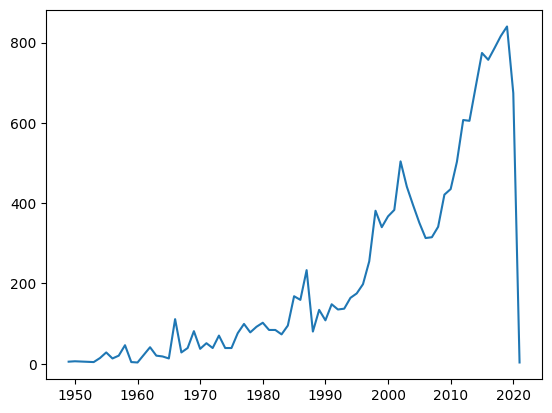

In [89]:
plt.plot(sets_by_year.index, sets_by_year.set_num)


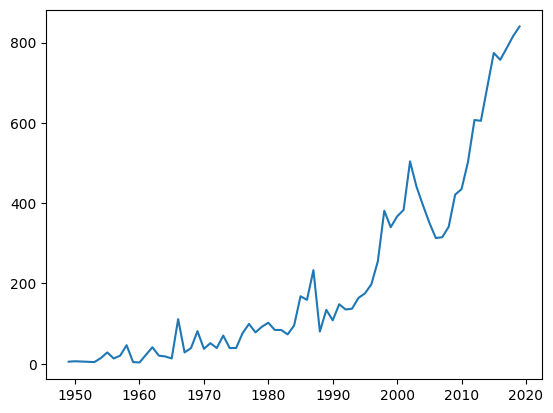

In [90]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2]) # This will plot the number of sets released each year, excluding the last two years for better visualization

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [91]:
themes_by_year = sets_df.groupby('year').agg({'theme_id' : pd.Series.nunique}) # This will group the DataFrame by year and count the number of unique themes for each year'})
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [92]:
themes_by_year.rename(columns={'theme_id': 'num_themes'}, inplace=True) # This will rename the 'theme_id' column to 'num_themes'
themes_by_year.head()

,num_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

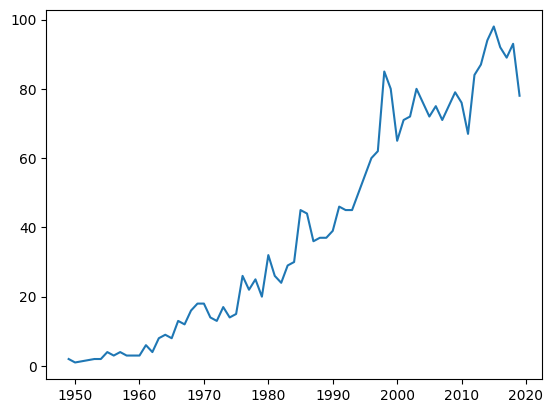

In [93]:
plt.plot(themes_by_year.index[:-2], themes_by_year.num_themes[:-2]) # This will plot the number of unique themes released each year

### Line Charts with Two Separate Axes

Text(0, 0.5, 'Number of Themes')

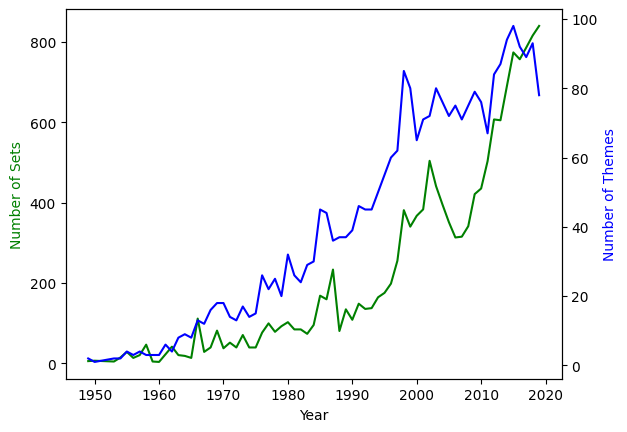

In [94]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create a second y-axis

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g') # plot the number of sets on the first y-axis and adding color
ax2.plot(themes_by_year.index[:-2], themes_by_year.num_themes[:-2], color='b') # plot the number of themes on the second y-axis and adding color

ax1.set_xlabel('Year') # set the x-axis label
ax1.set_ylabel('Number of Sets', color='g') # set the y-axis label
ax2.set_ylabel('Number of Themes', color='b') # set the second y-axis label

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [95]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean}) # This will group the DataFrame by set number and calculate the mean number of parts per set
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [96]:
parts_per_set.tail()


,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

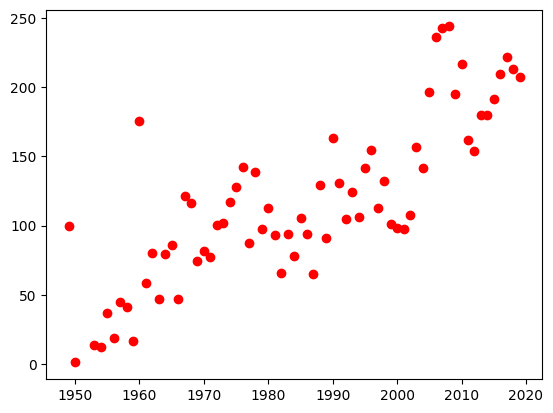

In [97]:
plt.scatter(sets_by_year.index[:-2], parts_per_set.num_parts[:-2], color='r') # This will create a scatter plot of the number of parts per set against the year, excluding the last two years for better visualization

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [98]:
set_theme_count = sets_df["theme_id"].value_counts() # This will count the number of sets for each theme
set_theme_count[:5] # Display the top 5 themes by number of sets

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

## LEGO database schema

<img src='assets/rebrickable_schema.png'>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [99]:
themes = pd.read_csv('data/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [ ]:
themes[themes.name == "The Lord of the Rings"]

,id,name,parent_id
467,566,The Lord of the Rings,561.0


### Merging (i.e., Combining) DataFrames based on a Key


In [101]:
set_theme_count = sets_df["theme_id"].value_counts()
set_theme_count[:5] 

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [102]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'num_sets': set_theme_count.values}) # This will create a DataFrame with the theme IDs and the number of sets for each theme
set_theme_count.head()


,id,num_sets
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [106]:
merged_df = pd.merge(set_theme_count, themes, on='id') # This will merge the set_theme_count DataFrame with the themes DataFrame on the 'id' column
merged_df[themes.name == 'The Lord of the Rings'] # Display the first 3 rows of the merged DataFrame

C:\Users\lucas\AppData\Local\Temp\ipykernel_58684\1497354900.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_df[themes.name == 'The Lord of the Rings'] # Display the first 3 rows of the merged DataFrame


,id,num_sets,name,parent_id
467,671,4,Forma,NaN


<BarContainer object of 10 artists>

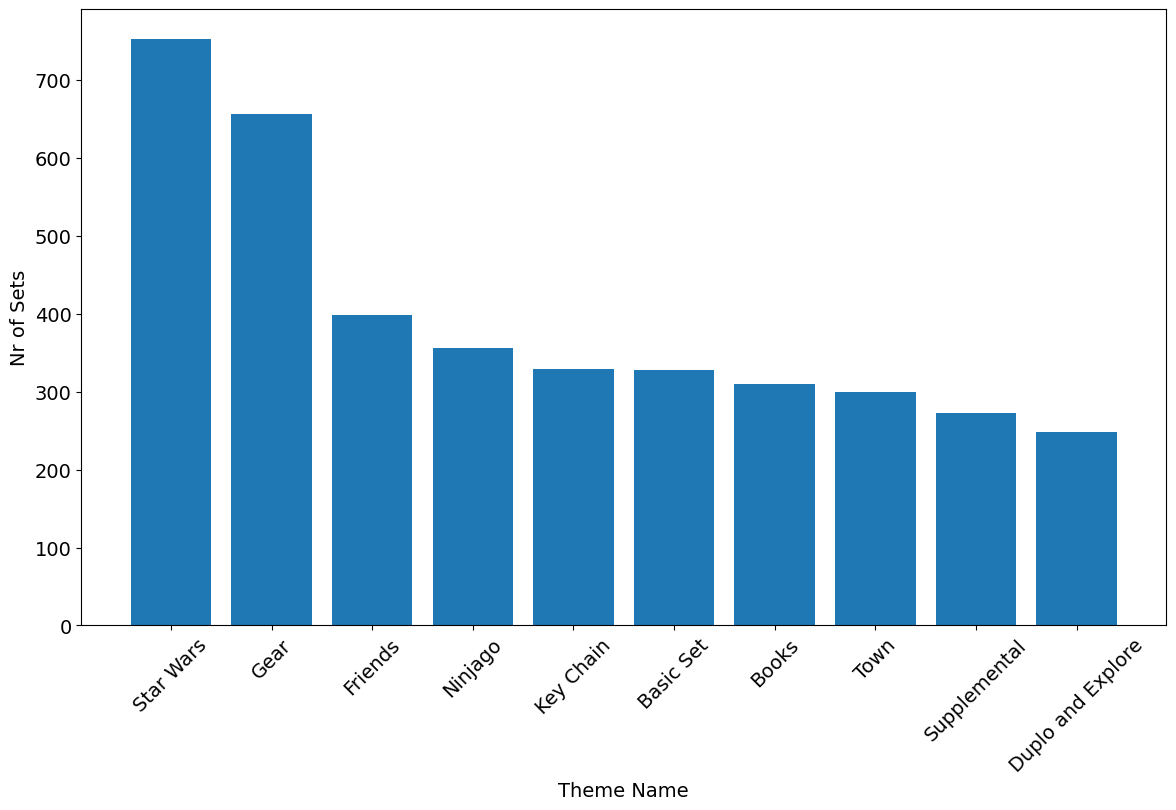

In [104]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.num_sets[:10]) # This will create a bar chart of the top 10 themes by number of sets


In [112]:
merged_df[merged_df['name'] == 'The Lord of the Rings']['num_sets'] # This will filter the merged DataFrame to show only the row where the theme name is 'The Lord of the Rings'

218    17
Name: num_sets, dtype: int64

In [113]:
merged_df[merged_df['name'] == 'The Hobbit']['num_sets']    # This will filter the merged DataFrame to show only the row where the theme name is 'The Hobbit'

149    23
Name: num_sets, dtype: int64